# 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read the data as a data frame

In [2]:
data_orig = pd.read_csv('bank-full.csv')
data_orig.head()

### Print the descriptive statistics of each & every column using describe() function

In [3]:
data_orig.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# 3. EDA

### 3.1 Shape of the data

In [4]:
print (data_orig.shape)

(45211, 17)


### 3.2 Data type of each attribute

In [5]:
data_orig.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### 3.3 Checking the presence of missing values

In [6]:
# Check for missing value
data_orig.isna().sum()

### We see that there no missing values in the dataset. However we would need to do closer inspection to see if there are dummy values
### in the dataset.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### 3.2 Analysing Numeric Attributes

In [7]:
data_orig['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [8]:
data_orig_num = data_orig.select_dtypes(['int64'])

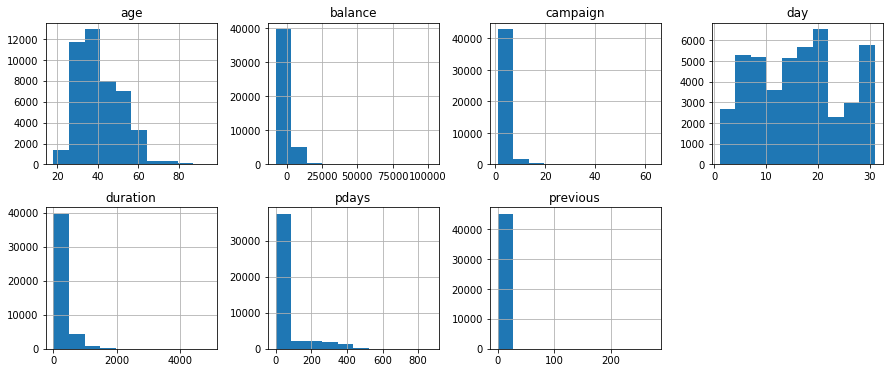

In [9]:
data_orig_num.hist(bins=10, figsize=(15, 6), layout=(2, 4));

In [10]:
# Standard Deviation of all Numeric Attributes
# All attributes have some standard deviation and hence they would not be dropped - for now
data_orig_num.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

### 3.4 Five point summary of numerical attributes

In [11]:
def print_five_point_summary(feature, feature_name, do_print=True):
    median = np.median(feature)
    
    sorted_feature_data = sorted(feature)
    q1, q3= np.percentile(sorted_feature_data,[25,75])

    min_value = np.min(sorted_feature_data)
    max_value = np.max(sorted_feature_data)

    if do_print:
        print ('\nPrinting 5 point summary for %s'%(feature_name))
        print ('-----------------------------------')
        print ('\nMax value of %s is %d'%(feature_name, max_value))
        print ('Min value of %s is %d'%(feature_name, min_value))
        print ('Median value of %s is %d'%(feature_name, median))
        print ('1st Quartile value of %s is %d'%(feature_name, q1))
        print ('3rd Quartile value of %s is %d'%(feature_name, q3))

    five_point_summary = {'median':median,
                         'q1':q1,
                         'q3':q3,
                         'minvalue':min_value,
                         'max_value':max_value}
    return five_point_summary

In [12]:
for col in data_orig_num.columns:
    print_five_point_summary(data_orig_num[col], col)


Printing 5 point summary for age
-----------------------------------

Max value of age is 95
Min value of age is 18
Median value of age is 39
1st Quartile value of age is 33
3rd Quartile value of age is 48

Printing 5 point summary for balance
-----------------------------------

Max value of balance is 102127
Min value of balance is -8019
Median value of balance is 448
1st Quartile value of balance is 72
3rd Quartile value of balance is 1428

Printing 5 point summary for day
-----------------------------------

Max value of day is 31
Min value of day is 1
Median value of day is 16
1st Quartile value of day is 8
3rd Quartile value of day is 21

Printing 5 point summary for duration
-----------------------------------

Max value of duration is 4918
Min value of duration is 0
Median value of duration is 180
1st Quartile value of duration is 103
3rd Quartile value of duration is 319

Printing 5 point summary for campaign
-----------------------------------

Max value of campaign is 63
Mi

In [13]:
data_orig_num.loc[data_orig['Target'] == 'no', 'Target'] = 0
data_orig_num.loc[data_orig['Target'] == 'yes', 'Target'] = 1

print(data_orig_num['Target'].value_counts())

print (data_orig['Target'].value_counts())

0.0    39922
1.0     5289
Name: Target, dtype: int64
no     39922
yes     5289
Name: Target, dtype: int64


C:\MachineLearning\anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\MachineLearning\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
data_orig_num['duration'] = data_orig_num['duration']/60
data_orig['duration'] = data_orig['duration']/60

C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 3.5 Checking the presence of outliers

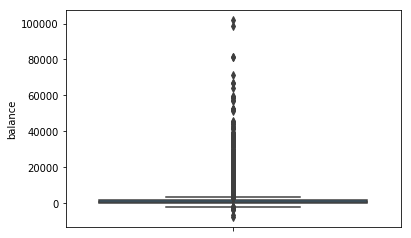

In [15]:
sns.boxplot(data_orig_num['balance'], orient='v')

## We see that the balance feature has quite a lot of outlier values. We would need to get a count of these outliers
## and if it's not a significant count we will remove those outliers

In [16]:
from scipy.stats import zscore

def remove_outliers (df, feature_name):
    
    rows_before = df.shape[0]
    
    feature_name_zscore = feature_name+'_zscore'
    
    df[feature_name_zscore] = zscore(df[feature_name])
    condition = (df[feature_name_zscore]>3) | (df[feature_name_zscore]<-3)
    df = df.drop(df[condition].index, axis=0, inplace=False)
    df = df.drop([feature_name_zscore], axis=1)
    
    rows_after = df.shape[0]
    
    print ('Number of rows which had outlier value for %s are %d'%(feature_name, (rows_before-rows_after)))
    sns.boxplot(df[feature_name], orient='v')
    
    return df

Number of rows which had outlier value for balance are 745


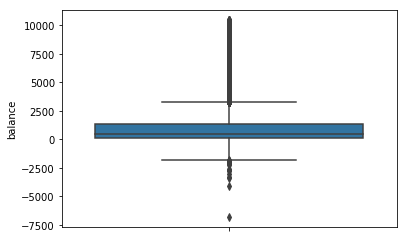

In [17]:
data_orig = remove_outliers(data_orig, 'balance')

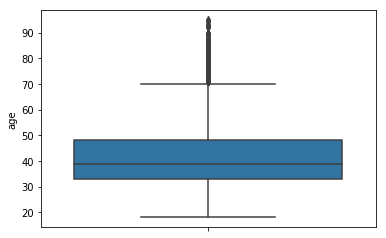

In [18]:
sns.boxplot(data_orig_num['age'], orient='v')

## We see that the age feature has few outlier values. We would need to get a count of these outliers
## and if it's not a significant count we will remove those outliers

Number of rows which had outlier value for age are 372


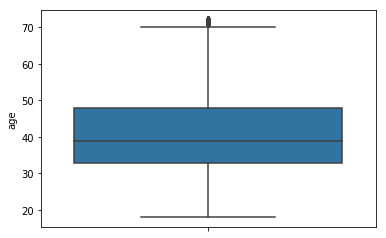

In [19]:
data_orig = remove_outliers(data_orig, 'age')

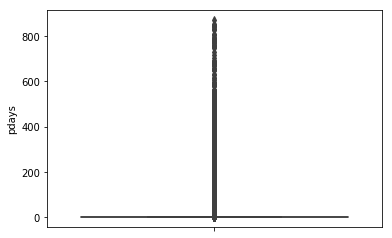

In [20]:
sns.boxplot(data_orig_num['pdays'], orient='v')

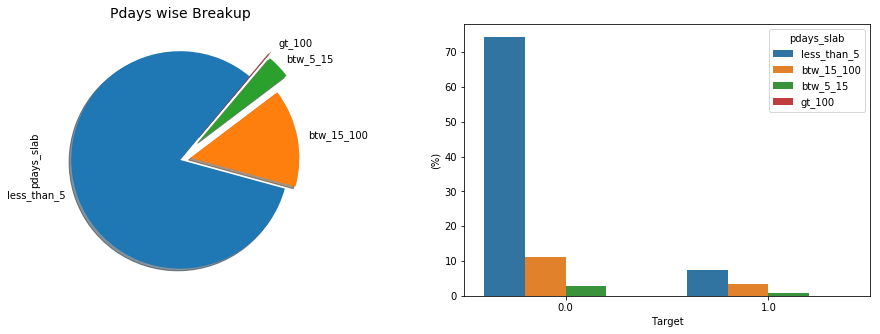

In [21]:
def get_pdays_slabs(pdays):
    if pdays < 5 :
        return 'less_than_5'
    elif pdays > 55 & pdays< 15:
        return 'btw_5_15'
    elif pdays > 15 & pdays<100:
        return 'btw_15_100'
    else :
        return 'gt_100'
        
data_orig_num["pdays_slab"] = data_orig_num['pdays'].apply(get_pdays_slabs)
data_orig["pdays_slab"] = data_orig['pdays'].apply(get_pdays_slabs)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Pdays wise Breakup", fontsize=14)
data_orig_num["pdays_slab"].value_counts().plot.pie(explode=[0,0.1,0.25,0.30], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="balance", hue="pdays_slab", data=data_orig_num, estimator=lambda x: len(x) / len(data_orig_num) * 100)
ax[1].set(ylabel="(%)")

plt.show()

data_orig_num = data_orig_num.drop(['pdays'], axis=1)
data_orig = data_orig.drop(['pdays'], axis=1)

### 3.5.1 Relationship betwee Features

#### Pair Plot of Numeric Marketing Data - Highligted by Success/Failure Measure

    1. More acceptance are seen When campaign duration is less (around 10) and call duration is smaller (~20 min)
    2. Across all ages more acceptances are seen when campaing duration is less (around 10)
    3. More acceptnace are seen when campaign duration is less and with clients having balance <20000
    4. More acceptance are seen when call duration is smaller (~20 min) with clients having balance <20000
    5. Across all age groups people who accepted offer had low balance (<20000)
   

C:\MachineLearning\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


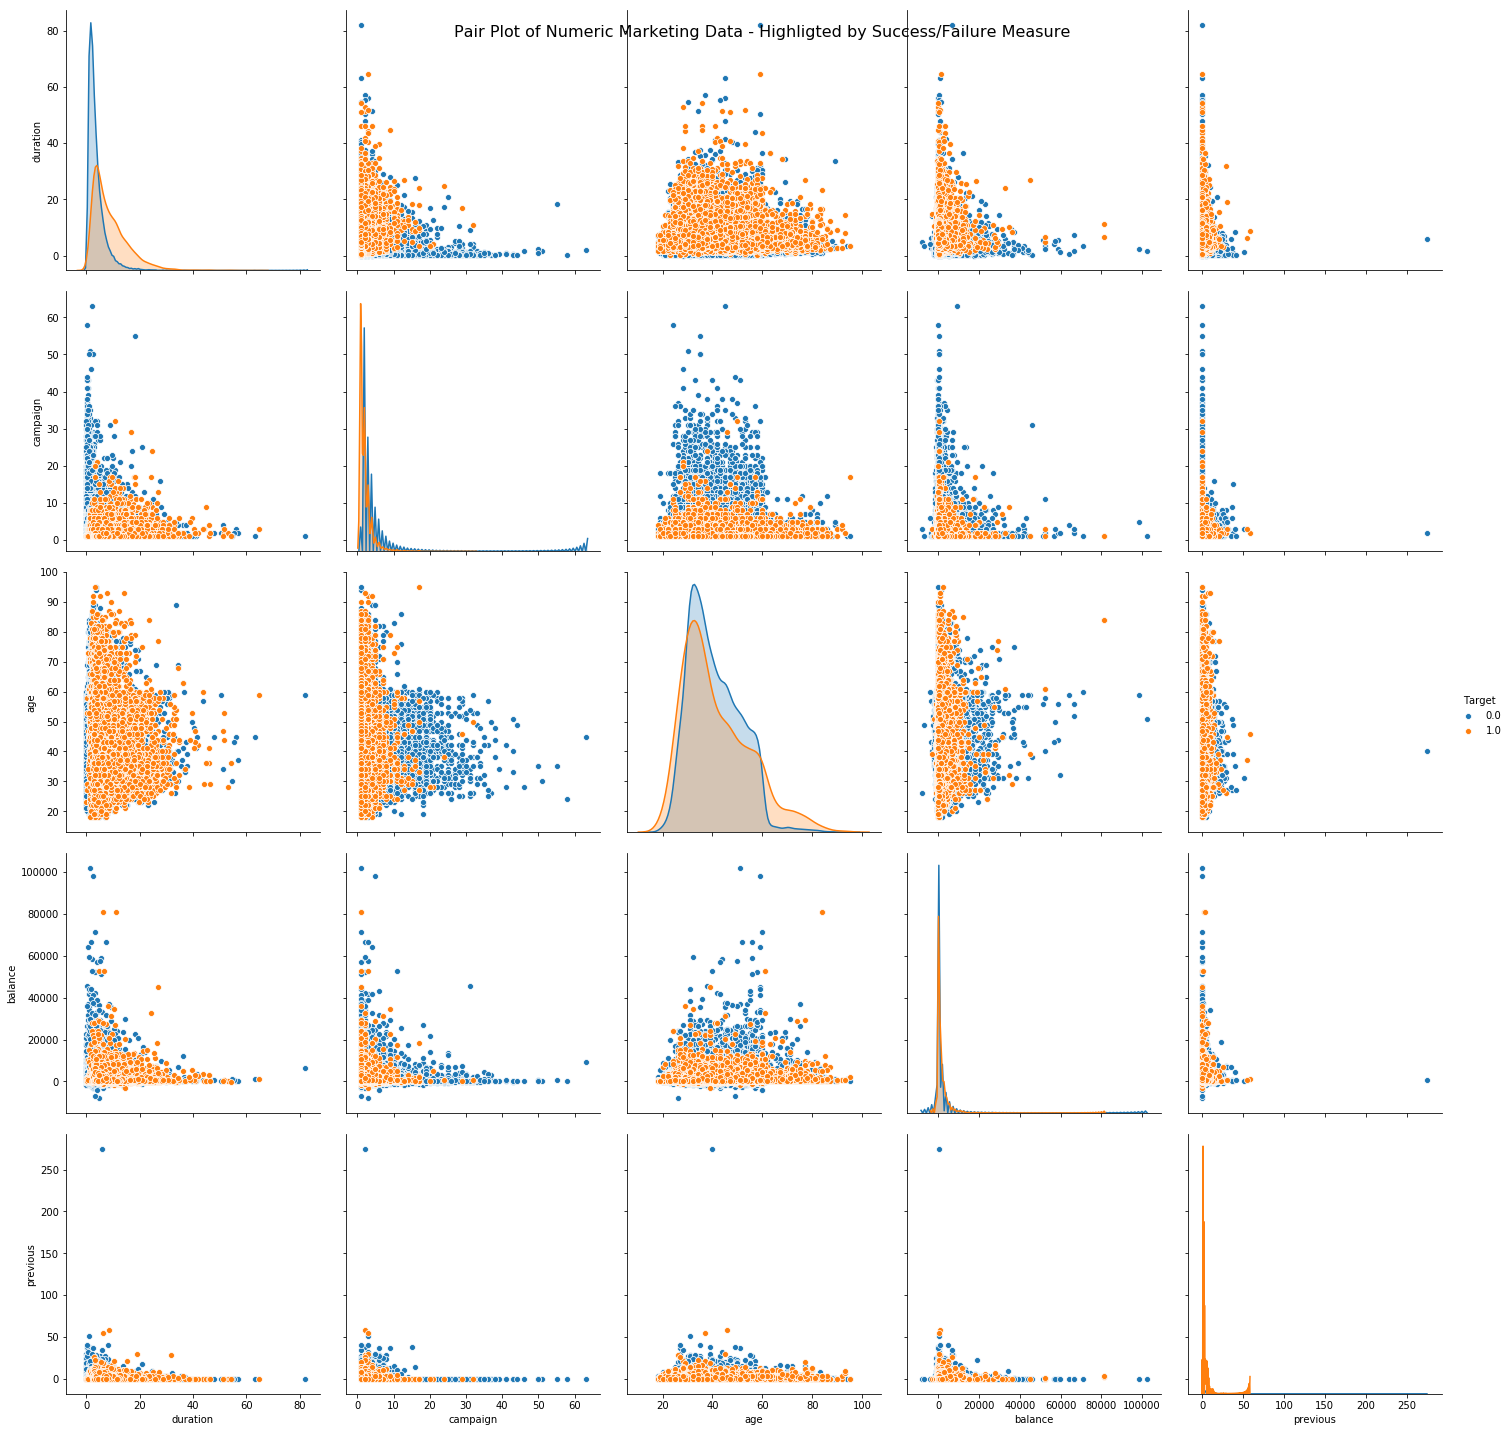

In [22]:
sns.pairplot(data_orig_num, hue='Target', vars=['duration', 'campaign','age','balance','previous'],size=4)
plt.suptitle('Pair Plot of Numeric Marketing Data - Highligted by Success/Failure Measure', size = 16);

Text(0.5, 1.0, 'Relationship b/w Age & Duration of calls')

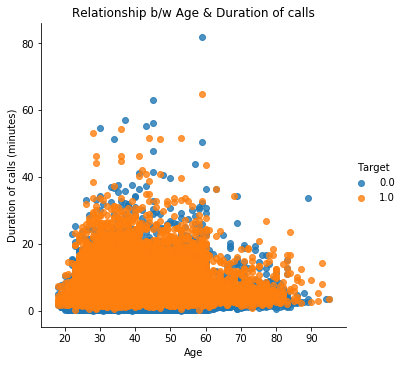

In [23]:
sns.lmplot(x='age',y='duration',hue='Target', data=data_orig_num, fit_reg=False)
plt.xlabel('Age')
plt.ylabel('Duration of calls (minutes)')
plt.title('Relationship b/w Age & Duration of calls')

## Graph below indicates when the duration of call is smaller and frequency is lower, chances of cliens accepting are high')

Text(0.5, 1.0, 'Relationship b/w Balance & Campaign Frequency')

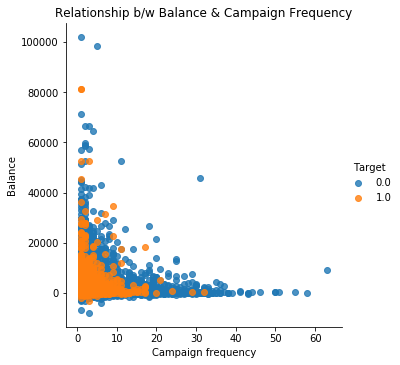

In [24]:
sns.lmplot(x='campaign',y='balance',hue='Target', data=data_orig_num, fit_reg=False)
plt.xlabel('Campaign frequency')
plt.ylabel('Balance')
plt.title('Relationship b/w Balance & Campaign Frequency')

## Graph below indicates when the duration of call is smaller and frequency is lower, chances of cliens accepting are high')

Text(0.5, 1.0, 'Relationship b/w Balance & Duration of calls')

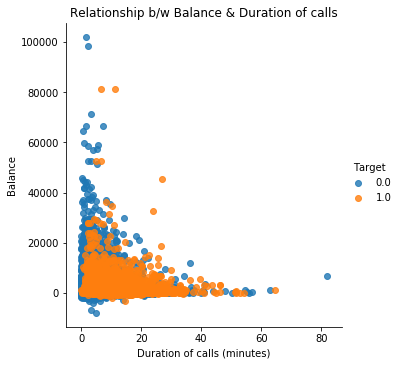

In [25]:
sns.lmplot(x='duration',y='balance',hue='Target', data=data_orig_num, fit_reg=False)
plt.xlabel('Duration of calls (minutes)')
plt.ylabel('Balance')
plt.title('Relationship b/w Balance & Duration of calls')

## Graph below indicates when the duration of call is smaller and frequency is lower, chances of cliens accepting are high')

#### 3.5.1 Relationship between Number of Calls , Duration of Calls & Outcome of Marketing Campaign

Text(0.5, 1.0, 'Relationship b/w Number of calls & Duration of calls')

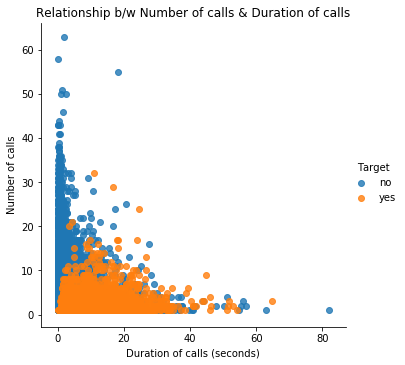

In [26]:
sns.lmplot(x='duration',y='campaign',hue='Target', data=data_orig, fit_reg=False)
plt.xlabel('Duration of calls (seconds)')
plt.ylabel('Number of calls')
plt.title('Relationship b/w Number of calls & Duration of calls')

## Graph below indicates when the duration of call is smaller and frequency is lower, chances of cliens accepting are high')

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Customer Age groups

    We find that majority of people approached for marketing campaign where either young (<35 years) or middle age (<55 years) old. 

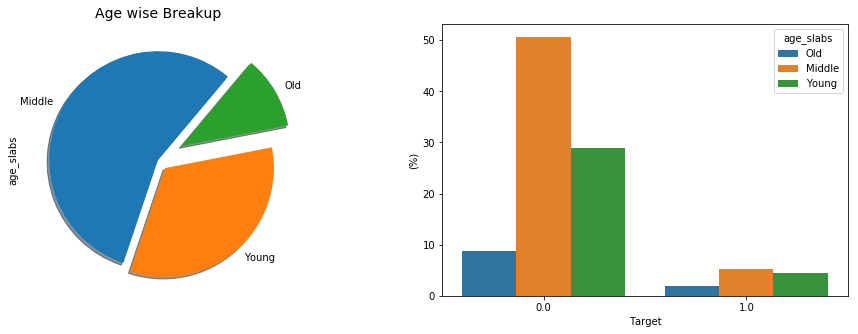

In [27]:
def get_age_slabs(annual_inc):
    if annual_inc < 35 :
        return 'Young'
    elif annual_inc > 55:
        return 'Old'
    else :
        return 'Middle'
        
data_orig_num["age_slabs"] = data_orig_num['age'].apply(get_age_slabs)
data_orig["age_slabs"] = data_orig['age'].apply(get_age_slabs)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Age wise Breakup", fontsize=14)
data_orig_num["age_slabs"].value_counts().plot.pie(explode=[0,0.1,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="age", hue="age_slabs", data=data_orig_num, estimator=lambda x: len(x) / len(data_orig_num) * 100)
ax[1].set(ylabel="(%)")

plt.show()

data_orig_num = data_orig_num.drop(['age'], axis=1)
data_orig = data_orig.drop(['age'], axis=1)

### 3.6 Understanding more about categorical variables

In [28]:
job_type_counts = data_orig['job'].value_counts()
print (job_type_counts)

### Finding - Some of the data points have 'unknown' job type - we will drop those columns

blue-collar      9645
management       9183
technician       7482
admin.           5116
services         4127
retired          1875
self-employed    1534
entrepreneur     1451
unemployed       1281
housemaid        1199
student           925
unknown           276
Name: job, dtype: int64


In [29]:
data_orig = data_orig.drop(data_orig[data_orig['job']=='unknown'].index)

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Marital status

married     26262
single      12519
divorced     5037
Name: marital, dtype: int64


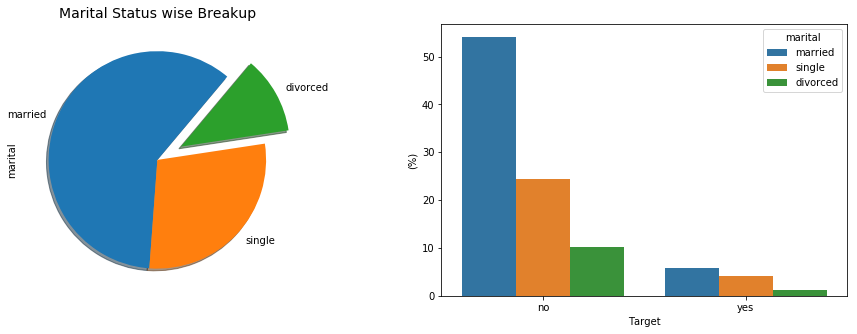

In [30]:
### Finding - All data points have valid marital status

marital_type_counts = data_orig['marital'].value_counts()
print (marital_type_counts)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Marital Status wise Breakup", fontsize=14)
data_orig["marital"].value_counts().plot.pie(explode=[0,0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="balance", hue="marital", data=data_orig, estimator=lambda x: len(x) / len(data_orig) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Education Level

    We find that more people who rejected the marketing campaign had secondary education.

secondary    22770
tertiary     12838
primary       6550
unknown       1660
Name: education, dtype: int64


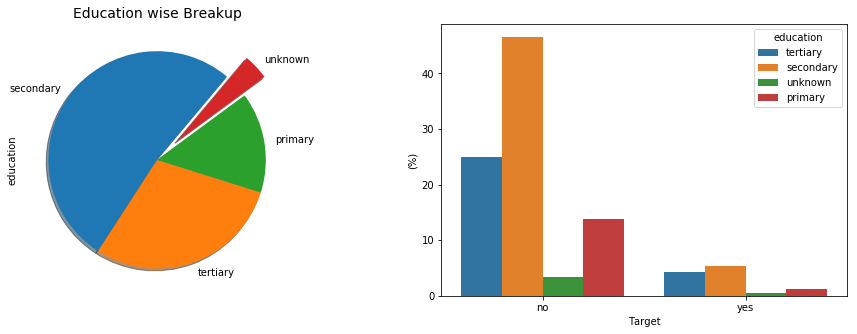

In [31]:
### Finding - Some of the data points have 'unknown' education type - This seems to be an acceptable value

education_type_counts = data_orig['education'].value_counts()
print (education_type_counts)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Education wise Breakup", fontsize=14)
data_orig["education"].value_counts().plot.pie(explode=[0,0,0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="balance", hue="education", data=data_orig, estimator=lambda x: len(x) / len(data_orig) * 100)
ax[1].set(ylabel="(%)")

plt.show()

In [32]:
data_orig = data_orig.drop(data_orig[data_orig['education']=='unknown'].index)

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Credit in default status

    We find that most people who were reached in campaign did not had any previous credits in default status.

no     41378
yes      780
Name: default, dtype: int64


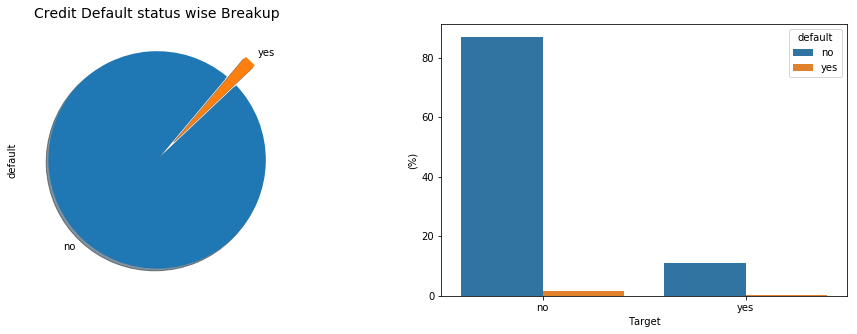

In [33]:
### Finding - All data points have valid values for 'default' feature

default_type_counts = data_orig['default'].value_counts()
print (default_type_counts)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Credit Default status wise Breakup", fontsize=14)
data_orig["default"].value_counts().plot.pie(explode=[0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="balance", hue="default", data=data_orig, estimator=lambda x: len(x) / len(data_orig) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Housing Features (where client has housing loan)

    We find that more people who had housing loans rejected the marketing campaign - which makes sense as well 

yes    23982
no     18176
Name: housing, dtype: int64


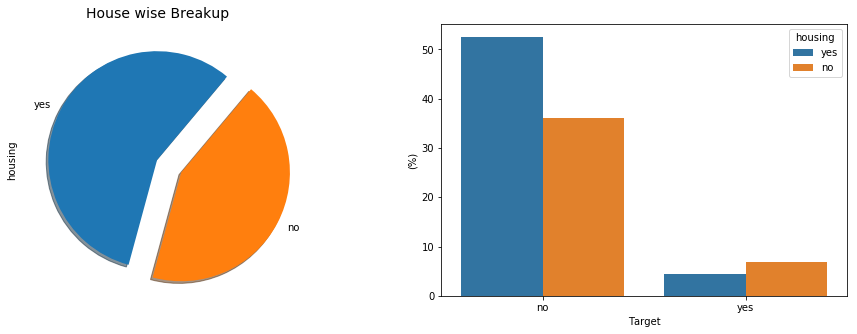

In [34]:
### Finding - All records have valid values for 'housing' feature

housing_counts = data_orig['housing'].value_counts()
print (housing_counts)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("House wise Breakup", fontsize=14)
data_orig["housing"].value_counts().plot.pie(explode=[0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="balance", hue="housing", data=data_orig, estimator=lambda x: len(x) / len(data_orig) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### 3.5.1 Breakup Analysis of Marketing Campaign Acceptance/Rejection by Loan Features (where client has Personal loan or not)

    We find that majority of people approached for marketing campaign did not had personal loan.

no     35089
yes     7069
Name: loan, dtype: int64


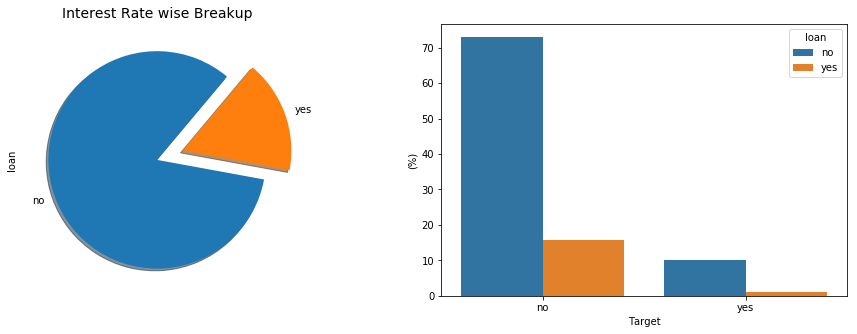

In [35]:
### Finding - All records have valid values for 'loan' feature

loan_counts = data_orig['loan'].value_counts()
print (loan_counts)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Interest Rate wise Breakup", fontsize=14)
data_orig["loan"].value_counts().plot.pie(explode=[0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="balance", hue="loan", data=data_orig, estimator=lambda x: len(x) / len(data_orig) * 100)
ax[1].set(ylabel="(%)")

plt.show()

In [36]:
### Finding - Some of the records have 'unknown' contact type. 
### This isn't mentioned to be a valid value and hence we need to find a way to deal with it.

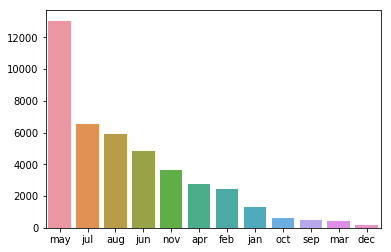

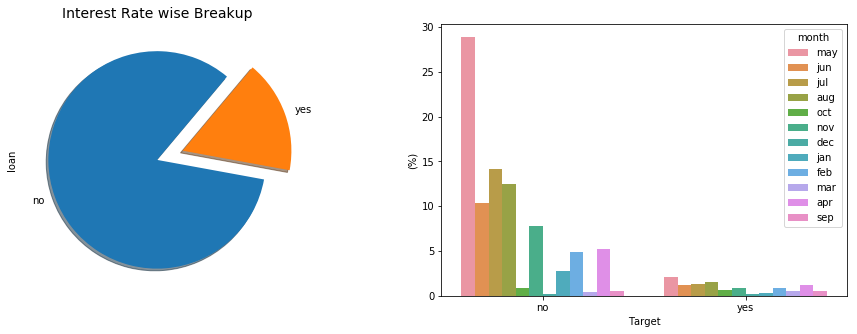

In [37]:
job_type_counts = data_orig['month'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Interest Rate wise Breakup", fontsize=14)
data_orig["loan"].value_counts().plot.pie(explode=[0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Target", y="balance", hue="month", data=data_orig, estimator=lambda x: len(x) / len(data_orig) * 100)
ax[1].set(ylabel="(%)")

plt.show()

### Finding - All records have valid values for 'month' feature - Most rejections in month of May,June, July, August

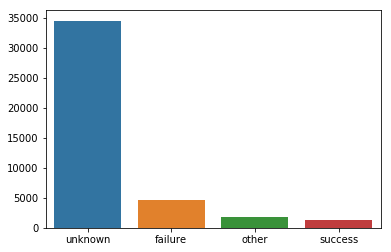

In [38]:
job_type_counts = data_orig['poutcome'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the records have 'unknown' and 'other' poutcome. Feature documentation suggests that there should
### be three values of 'success', 'failure' and 'nonexistent', so we will convert accordingly.

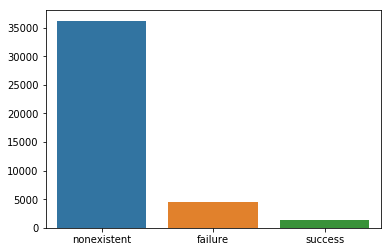

In [39]:
data_orig['poutcome']=np.where(data_orig['poutcome']=='unknown','nonexistent',data_orig['poutcome'])
data_orig['poutcome']=np.where(data_orig['poutcome']=='other','nonexistent',data_orig['poutcome'])

job_type_counts = data_orig['poutcome'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

# drop poutcome column
data_orig = data_orig.drop('poutcome',axis=1)

### 3.7 See the distribution of 'Class' variable and plot it using appropriate graph

In [40]:
data_orig.groupby('Target').agg({'Target':'count'})

### Finding -> We see that majority of people contact had not accepted the offer

,Target
Target,
no,37394
yes,4764


## Finding Important Features Or Correlation Matrix with Heatmap

    - One of the ways we can find important features for this dataset is to plot a HeatMap which would show corerelation between each feature
   

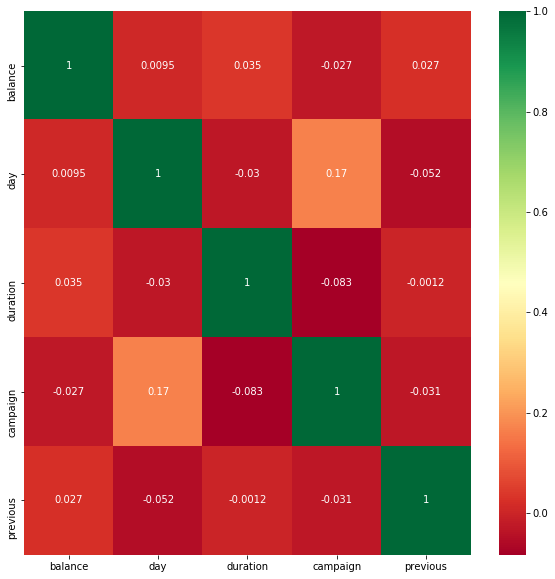

In [41]:
corelation_matrix = data_orig.corr()
top_corelation_features = corelation_matrix.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data_orig[top_corelation_features].corr(), annot=True, cmap='RdYlGn')

# 4. Prepare the data to train a model 

In [42]:
y = data_orig['Target']
data_orig_without_target = data_orig.drop('Target',axis=1)
data_orig_wt = data_orig_without_target

### 4.1 Get rid of the missing values

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['balance','duration','campaign','day','previous']

for c in cols_to_scale:
    scaled_c = scaler.fit_transform(data_orig_wt[c].values.reshape(-1,1))
    data_orig_wt[c] = scaled_c
    
#partial_scaled_data = scaler.fit_transform(data_orig_wt[['balance','duration','campaign','day','previous']])
#partial_scaled_data_df = pd.DataFrame(data=partial_scaled_data, columns=['balance','duration','campaign','day','previous'])

#encoded_data = data_orig_wt.drop(cols_to_scale,axis=1)
#data_orig_wt = pd.concat([encoded_data, partial_scaled_data_df],axis=1)

# there should be no impact on shape of dataframe due to scaling - hence an assertion to check that
assert data_orig_without_target.shape[0] == data_orig_wt.shape[0]
assert data_orig_without_target.shape[1] == data_orig_wt.shape[1]

print ('Size of dataset after scaling is ', data_orig_wt.shape)

Size of dataset after scaling is  (42158, 15)


In [46]:
data_orig_wt.loc[data_orig_wt['default'] == 'no', 'default'] = 0
data_orig_wt.loc[data_orig_wt['default'] == 'yes', 'default'] = 1

data_orig_wt.loc[data_orig_wt['housing'] == 'no', 'housing'] = 0
data_orig_wt.loc[data_orig_wt['housing'] == 'yes', 'housing'] = 1

data_orig_wt.loc[data_orig_wt['loan'] == 'no', 'loan'] = 0
data_orig_wt.loc[data_orig_wt['loan'] == 'yes', 'loan'] = 1

print ('Size of dataset after encoding is ', data_orig_wt.shape)

Size of dataset after encoding is  (42158, 15)


C:\MachineLearning\anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [47]:
cols_to_encode = ['job','marital','education','contact','month','pdays_slab','age_slabs']

for c in cols_to_encode:
    partial_encoded_df = pd.get_dummies(data_orig_wt[c],prefix=c)
    encoded_data = data_orig_wt.drop(c,axis=1)
    data_orig_wt = pd.concat([encoded_data, partial_encoded_df],axis=1)
        
print ('Size of dataset after one hot encoding is ', data_orig_wt.shape)

Size of dataset after one hot encoding is  (42158, 47)


# 5. Standard Classification Algorithms Training & Evaluation

In [48]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

data_orig_wt['Target'] = y
data_orig_wt.loc[data_orig_wt['Target'] == 'no', 'Target'] = 0
data_orig_wt.loc[data_orig_wt['Target'] == 'yes', 'Target'] = 1

#data_orig_wt = data_orig_wt.dropna(how='any',axis=0)

y = data_orig_wt['Target']
data_orig_wt = data_orig_wt.drop('Target',axis=1)

print ('Size of dataset after encoding target is ', data_orig_wt.shape)

data_orig_wt.to_csv('bank_final.csv')

trainX, testX, trainY, testY = train_test_split(data_orig_wt, y)
smt = SMOTE()
trainX, trainY = smt.fit_sample(trainX, trainY)

Using TensorFlow backend.


Size of dataset after encoding target is  (42158, 47)
0        0
1        0
2        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
14       0
15       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
        ..
45178    1
45179    0
45180    0
45181    0
45182    1
45183    0
45184    0
45185    1
45187    1
45188    1
45189    0
45190    1
45192    1
45193    1
45194    0
45195    1
45196    1
45197    1
45198    0
45199    0
45200    1
45201    1
45202    1
45203    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 42158, dtype: int64
0    28058
1     3560
Name: Target, dtype: int64


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

def show_model_performance (predY, testY):
    
    print ('Accuracy Score is ', accuracy_score(testY, predY))
    print ('F1 Score is ', f1_score(testY, predY))
    
    print (confusion_matrix(testY, predY))
    print (classification_report(testY, predY))


In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(trainX, trainY)
predY = lr.predict(testX)

show_model_performance(predY, testY)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score is  0.8373814041745731
F1 Score is  0.5339858618814572
[[7844 1492]
 [ 222  982]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      9336
           1       0.40      0.82      0.53      1204

    accuracy                           0.84     10540
   macro avg       0.68      0.83      0.72     10540
weighted avg       0.91      0.84      0.86     10540



# Implementation 2 - Using Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(trainX, trainY)
predY = dt_model.predict(testX)

show_model_performance(predY, testY)

#Print the feature importance of the decision model
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = data_orig_wt.columns))

Accuracy Score is  0.8697343453510437
F1 Score is  0.47655356462066334
[[8542  794]
 [ 579  625]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      9336
           1       0.44      0.52      0.48      1204

    accuracy                           0.87     10540
   macro avg       0.69      0.72      0.70     10540
weighted avg       0.88      0.87      0.87     10540

                             Imp
default                 0.000791
balance                 0.055599
housing                 0.073757
loan                    0.011311
day                     0.076813
duration                0.308385
campaign                0.085125
previous                0.022805
job_admin.              0.006751
job_blue-collar         0.007165
job_entrepreneur        0.002142
job_housemaid           0.001181
job_management          0.006423
job_retired             0.003615
job_self-employed       0.002717
job_services            0.004715
job_student   

# Implementation 3 - Using Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(n_estimators=10,
        max_depth=10, 
        bootstrap=True,
        criterion = 'entropy', 
        random_state=1)

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(trainX, trainY)
print (CV_rfc.best_params_)

KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(n_estimators=10,
        max_depth=10, 
        bootstrap=True,
        criterion = 'entropy', 
        random_state=1)

rf.fit(trainX, trainY)
predY = rf.predict(testX)

show_model_performance(predY, testY)

#Print the feature importance of the decision model
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = data_orig_wt.columns))

## Implementation 4 - Adaboost Ensemble Algorithm

In [61]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(trainX, trainY)

predY = abcl.predict(testX)
show_model_performance(predY, testY)

#Print the feature importance of the decision model
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = data_orig_wt.columns))

Accuracy Score is  0.8241935483870968
F1 Score is  0.4971506105834464
[[7771 1565]
 [ 288  916]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      9336
           1       0.37      0.76      0.50      1204

    accuracy                           0.82     10540
   macro avg       0.67      0.80      0.70     10540
weighted avg       0.90      0.82      0.85     10540

                             Imp
default                 0.000603
balance                 0.036628
housing                 0.075988
loan                    0.037398
day                     0.020446
duration                0.352367
campaign                0.080482
previous                0.054553
job_admin.              0.003064
job_blue-collar         0.011974
job_entrepreneur        0.001133
job_housemaid           0.002299
job_management          0.006682
job_retired             0.001624
job_self-employed       0.001602
job_services            0.002300
job_student    

# 7. Compare Performance of All Models